In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (888903, 299)
X teste =  (380959, 299)
y multiclasse treino =  (888903,)
y multiclasse teste =  (380959,)
y binário treino =  (888903,)
y binário teste =  (380959,)


In [5]:
y_train50_binary_train.value_counts()

0    776326
1    112577
Name: Label_binary, dtype: int64

In [6]:
y_train50_multiclass_train.value_counts()

Benign            776326
Generic            75464
Exploits           15635
Fuzzers             8530
DoS                 5655
Reconnaissance      4899
Analysis             931
Backdoor             832
Shellcode            576
Worms                 55
Name: Label_multiclass, dtype: int64

In [7]:
y_train50_binary_test.value_counts()

0    332900
1     48059
Name: Label_binary, dtype: int64

In [8]:
y_train50_multiclass_test.value_counts()

Benign            332900
Generic            32276
Exploits            6627
Fuzzers             3592
DoS                 2521
Reconnaissance      2094
Analysis             407
Backdoor             332
Shellcode            179
Worms                 31
Name: Label_multiclass, dtype: int64

In [9]:
X_train50_train.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_ftp-data,service_http,service_irc,service_others,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
152963,0.000007,104,0,254,0,0,0,5.942857e+07,0.000000e+00,2,...,0,0,0,1,0,0,0,0,0,0
627588,0.013839,2230,13358,31,29,7,11,1.251536e+06,7.507479e+06,34,...,0,0,0,1,0,0,0,0,0,0
37398,8.233840,25576,1094788,31,29,38,390,2.479523e+04,1.062457e+06,456,...,0,0,0,1,0,0,0,0,0,0
486419,0.000004,200,0,254,0,0,0,2.000000e+08,0.000000e+00,2,...,0,0,0,1,0,0,0,0,0,0
1203796,0.016772,2974,33122,31,29,7,18,1.389459e+09,1.548295e+07,48,...,0,0,0,1,0,0,0,0,0,0


In [10]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['Benign' 'Exploits' 'DoS' 'Generic' 'Reconnaissance' 'Fuzzers' 'Analysis'
 'Shellcode' 'Backdoor' 'Worms']
[0 1]


In [11]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [13]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [14]:
import pickle

In [15]:
with open('df_unsw_test50_no_preprocessing_getdummies', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [16]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1269864, 299)
y multiclasse =  (1269864,)
y binário =  (1269864,)


In [17]:
y_test50_multiclass.value_counts()

Benign            1109226
Generic            107740
Exploits            22262
Fuzzers             12123
DoS                  8176
Reconnaissance       6993
Analysis             1338
Backdoor             1164
Shellcode             755
Worms                  87
Name: Label_multiclass, dtype: int64

In [18]:
y_test50_binary.value_counts()

0    1109226
1     160638
Name: Label_binary, dtype: int64

In [19]:
X_test50.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,service_ftp-data,service_http,service_irc,service_others,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,0.022495,2934,3742,31,29,11,15,1.023516e+06,1.306246e+06,52,...,0,0,0,0,0,0,0,0,0,0
1,0.001105,146,178,31,29,0,0,5.285068e+05,6.443439e+05,2,...,0,0,0,0,0,0,0,0,0,0
2,0.573081,824,1298,62,252,2,2,1.035805e+04,1.585814e+04,10,...,0,1,0,0,0,0,0,0,0,0
3,0.001063,146,178,31,29,0,0,5.493886e+05,6.698025e+05,2,...,0,0,0,0,0,0,0,0,0,0
4,0.001016,146,178,31,29,0,0,5.748031e+05,7.007874e+05,2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['Benign' 'Generic' 'Backdoor' 'Analysis' 'DoS' 'Exploits'
 'Reconnaissance' 'Fuzzers' 'Worms' 'Shellcode']
[0 1]


In [21]:
#X_test50.shape

In [22]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

In [23]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [25]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo LightBGM para Train e Validation - Train50

In [26]:
import lightgbm as lgb

### Predição train50 binária

In [27]:
lgb_train50_binary = lgb.LGBMClassifier(objective='binary', n_estimators=100, max_depth=8, random_state=42)

In [28]:
lgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

LGBMClassifier(max_depth=8, objective='binary', random_state=42)

In [29]:
predict_train50_binary = lgb_train50_binary.predict(X_train50_test)

In [30]:
predict_train50_binary

array([1, 0, 0, ..., 1, 0, 0])

In [31]:
y_train50_binary_test

array([1, 0, 0, ..., 1, 0, 0])

In [32]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9987557716184682

### Visualização da árvore binária

In [33]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [34]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [35]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

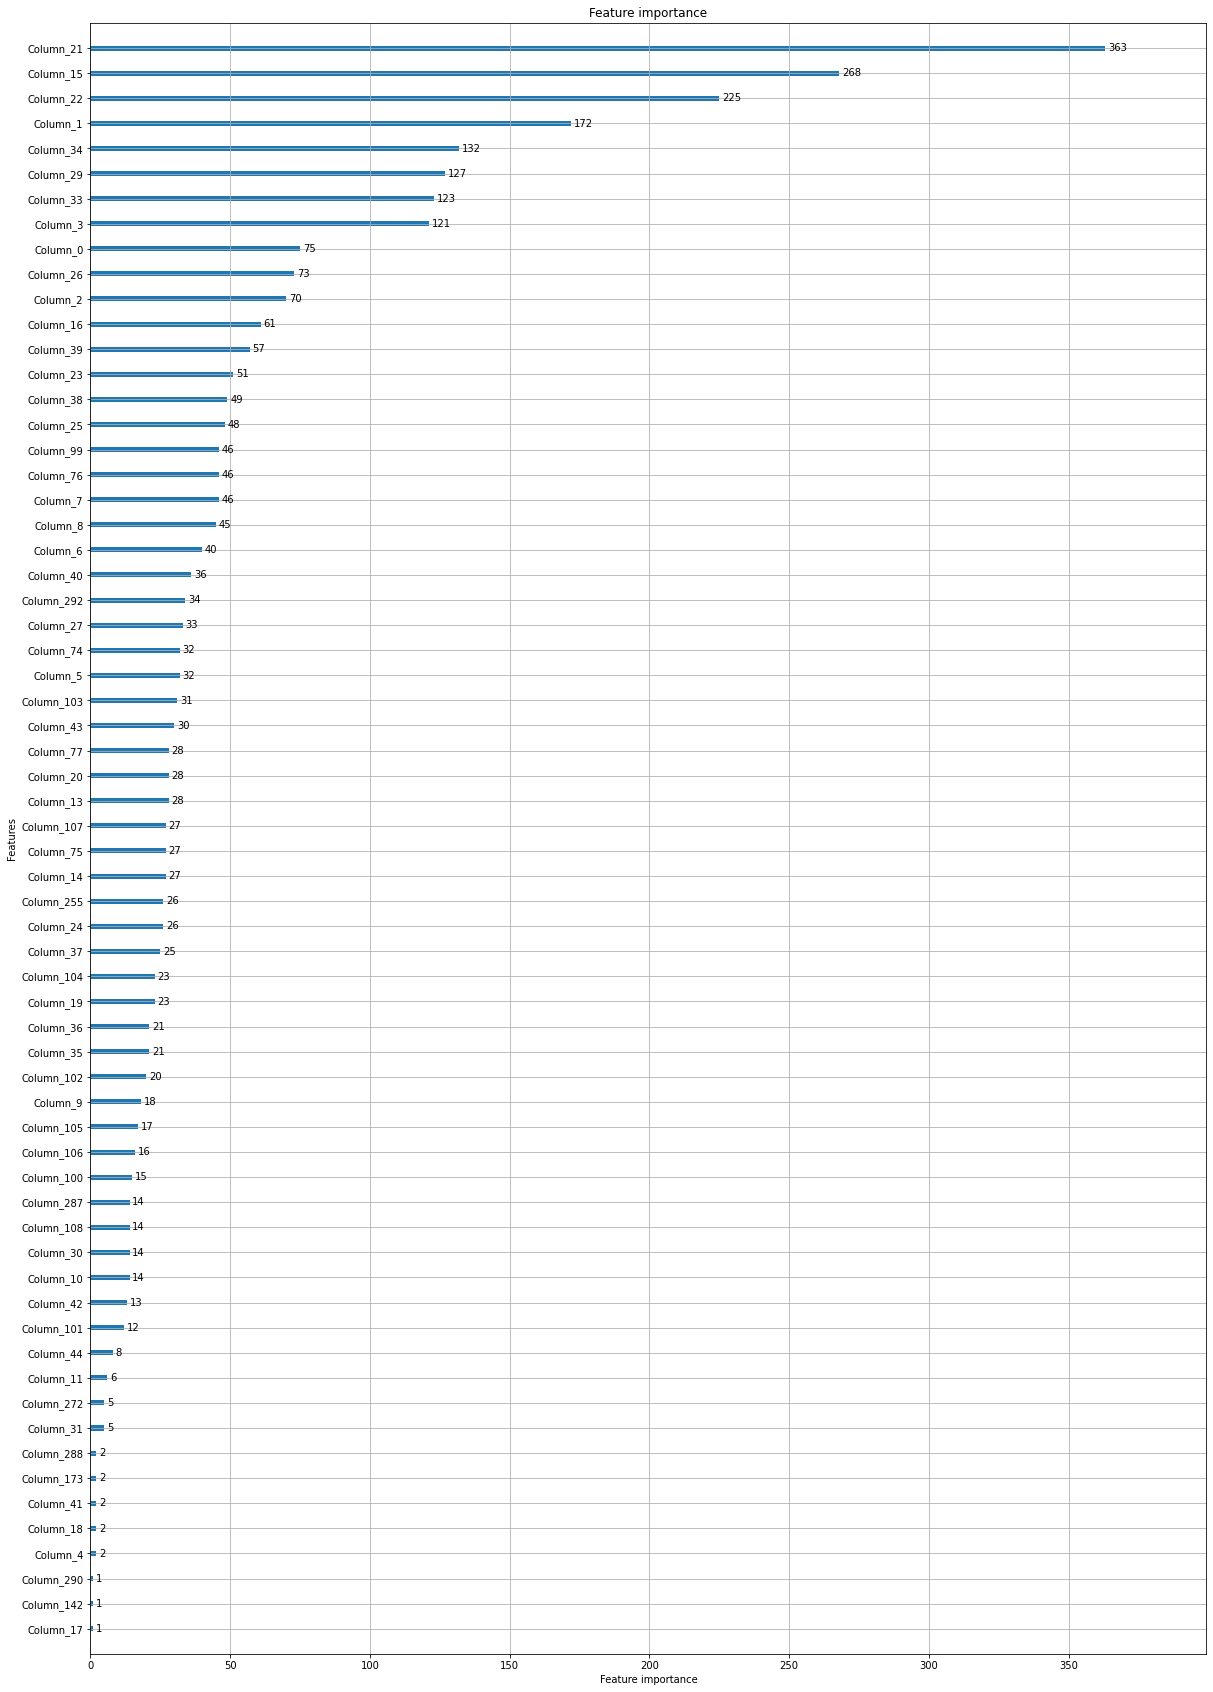

In [36]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [37]:
lgb_train50_multiclass = lgb.LGBMClassifier(objective='multiclass', n_estimators=100, max_depth=8, random_state=42)

In [38]:
lgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

LGBMClassifier(max_depth=8, objective='multiclass', random_state=42)

In [39]:
predict_train50_multiclass = lgb_train50_multiclass.predict(X_train50_test)

In [40]:
predict_train50_multiclass

array(['Exploits', 'Benign', 'Benign', ..., 'DoS', 'Generic', 'Benign'],
      dtype=object)

In [41]:
y_train50_multiclass_test

array(['Exploits', 'Benign', 'Benign', ..., 'Exploits', 'Benign',
       'Benign'], dtype=object)

In [42]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9774332670969842

### Visualização da árvore multiclasse

In [43]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [44]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

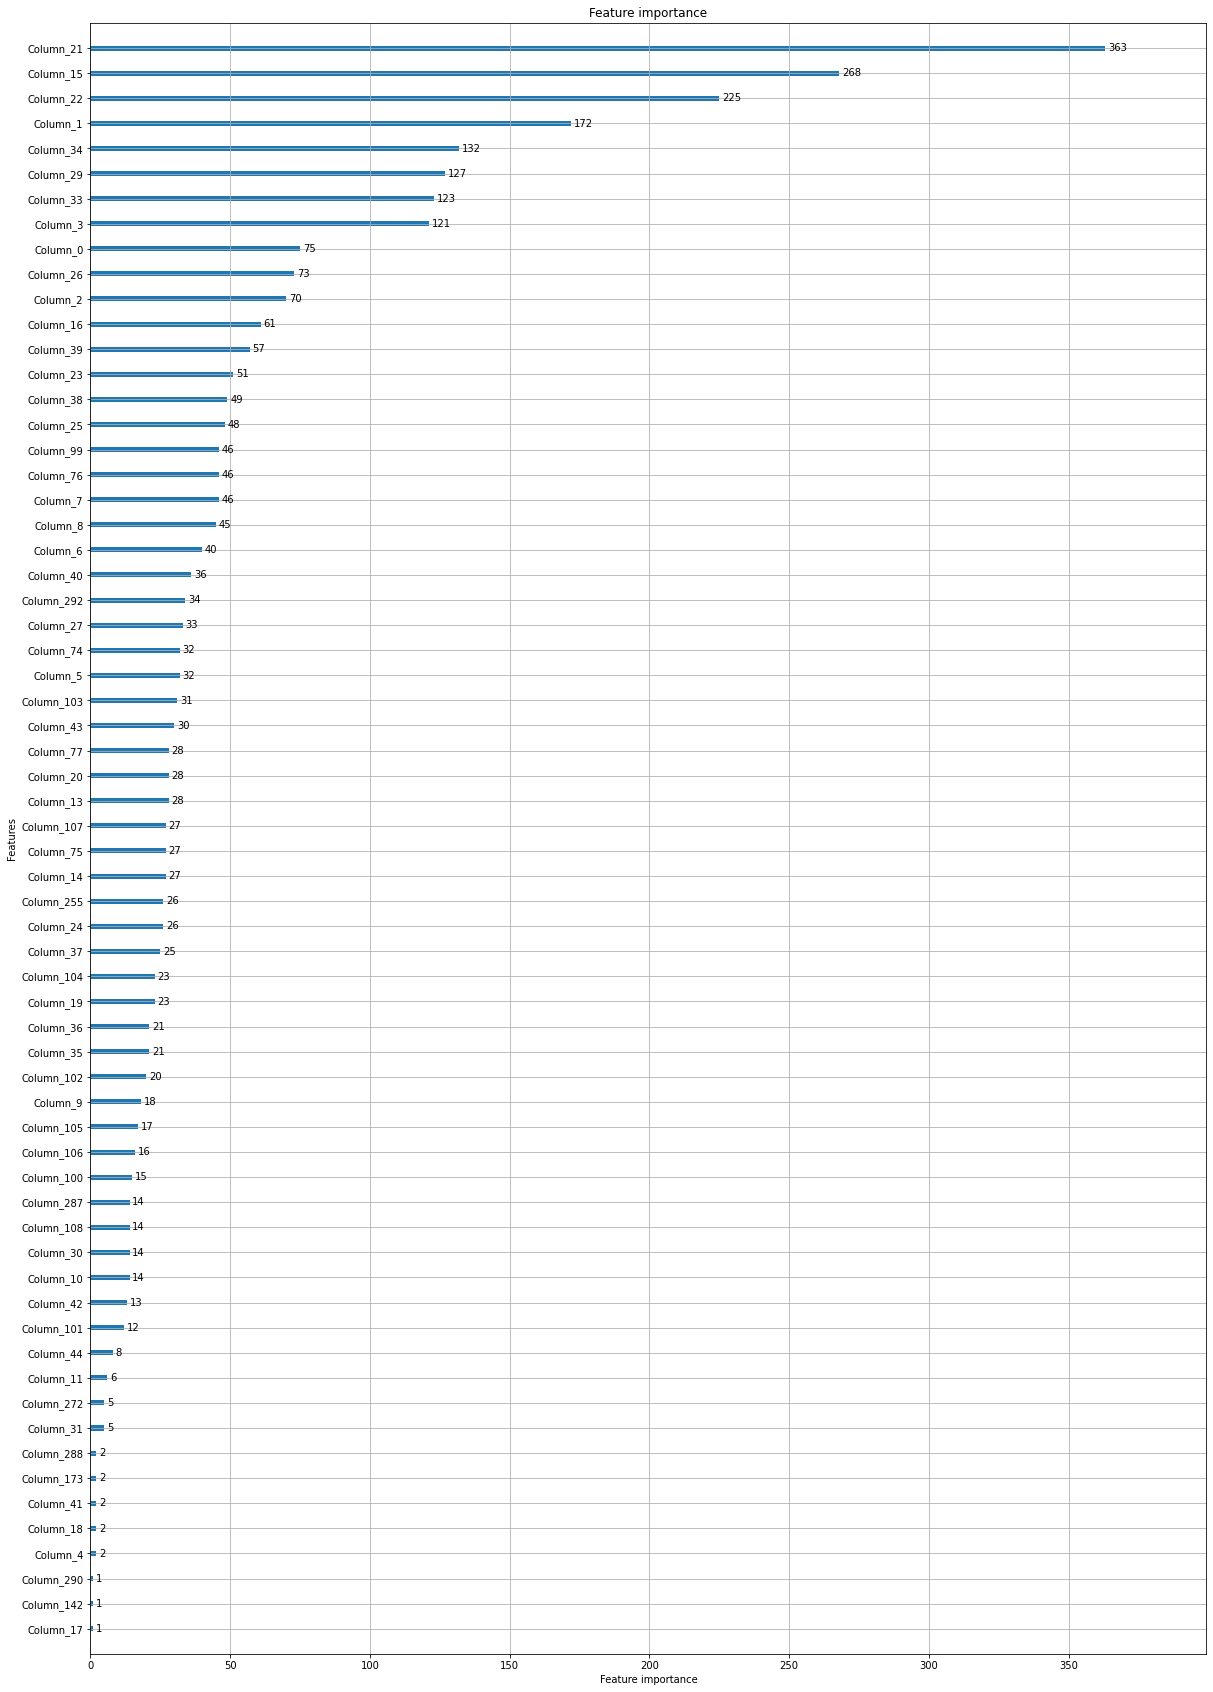

In [45]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

In [46]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [47]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999402  0.999174  0.999288    332900
           1   0.994287  0.995859  0.995072     48059

    accuracy                       0.998756    380959
   macro avg   0.996844  0.997517  0.997180    380959
weighted avg   0.998757  0.998756  0.998756    380959



In [48]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.089577  0.135135  0.107738       407
      Backdoor   0.027415  0.063253  0.038251       332
        Benign   0.997978  0.997942  0.997960    332900
           DoS   0.316323  0.334391  0.325106      2521
      Exploits   0.637069  0.607364  0.621862      6627
       Fuzzers   0.672569  0.602728  0.635736      3592
       Generic   0.984384  0.976515  0.980434     32276
Reconnaissance   0.780987  0.710124  0.743872      2094
     Shellcode   0.070815  0.184358  0.102326       179
         Worms   0.000000  0.000000  0.000000        31

      accuracy                       0.977433    380959
     macro avg   0.457712  0.461181  0.455328    380959
  weighted avg   0.979443  0.977433  0.978379    380959



### Cross Validation do train50

In [49]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(lgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [50]:
score_cv_train50_binary

array([0.99862753, 0.99853753, 0.99860503, 0.99889751, 0.99875127,
       0.99879627, 0.99881876, 0.99875127, 0.99868377, 0.99866127])

In [51]:
cv_result_train50_binary

[0.9987130208458763]

In [52]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(lgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [53]:
score_cv_train50_multiclass

array([0.978828  , 0.97773678, 0.97288814, 0.97840027, 0.97754528,
       0.97613905, 0.97927776, 0.97834402, 0.97693779, 0.97697154])

In [54]:
cv_result_train50_multiclass

[0.977306863029671]

### Matriz de Confusão do train50

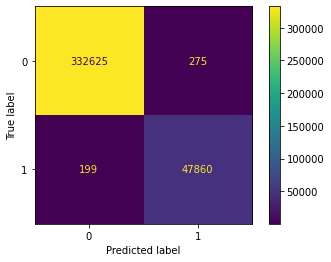

In [55]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

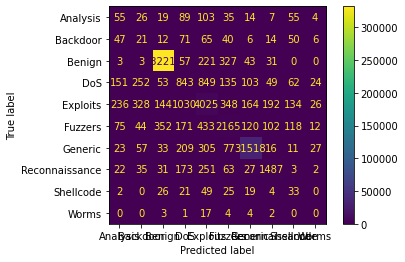

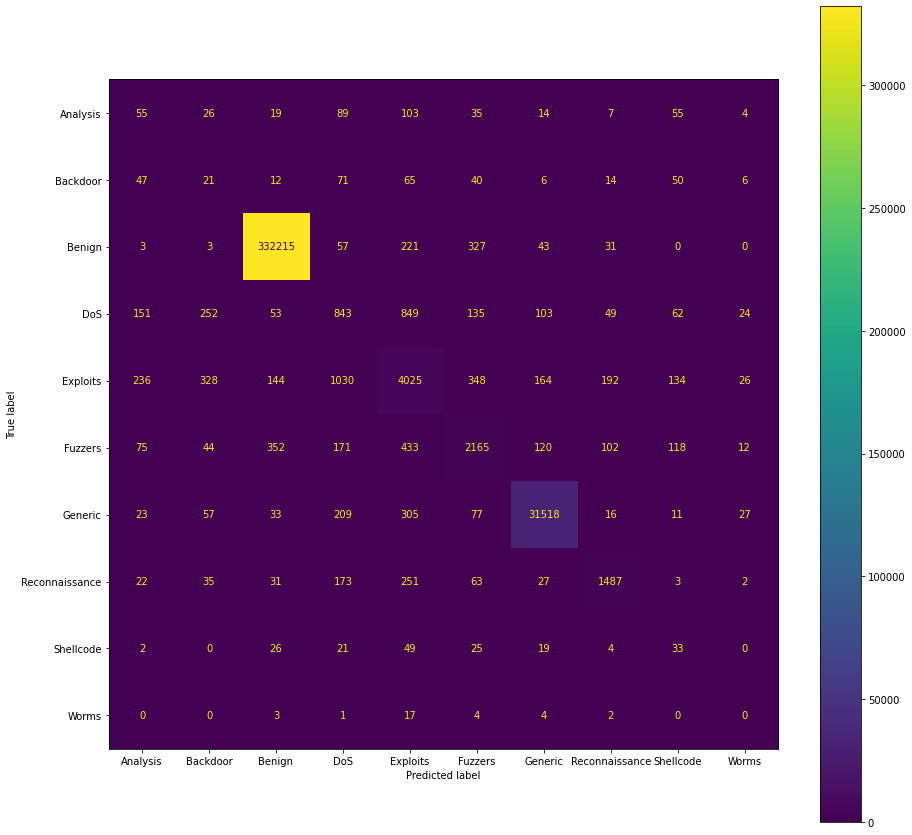

In [56]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)

# Algoritmo LightBGM para Test50

### Predição Test50 binária

In [57]:
predict_test50_binary = lgb_train50_binary.predict(X_test50)

In [58]:
predict_test50_binary

array([0, 0, 1, ..., 1, 0, 0])

In [59]:
y_test50_binary

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9692463129909975

### Predição test50 multiclasse

In [61]:
predict_test50_multiclass = lgb_train50_multiclass.predict(X_test50)

In [62]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Analysis', 'Benign', 'Benign'],
      dtype=object)

In [63]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Exploits', 'Benign', 'Benign'],
      dtype=object)

In [64]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.8272413423799714

### Precision e Recall do test50

In [65]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   1.000000  0.964793  0.982081   1109226
           1   0.804433  1.000000  0.891618    160638

    accuracy                       0.969246   1269864
   macro avg   0.902216  0.982396  0.936850   1269864
weighted avg   0.975261  0.969246  0.970637   1269864



In [66]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.043163  0.079970  0.056065      1338
      Backdoor   0.034945  0.073883  0.047448      1164
        Benign   0.999745  0.844041  0.915318   1109226
           DoS   0.209309  0.429550  0.281467      8176
      Exploits   0.191769  0.091681  0.124054     22262
       Fuzzers   0.112716  0.122329  0.117326     12123
       Generic   0.371961  0.976072  0.538653    107740
Reconnaissance   0.477378  0.265551  0.341266      6993
     Shellcode   0.014545  0.005298  0.007767       755
         Worms   0.000000  0.000000  0.000000        87

      accuracy                       0.827241   1269864
     macro avg   0.245553  0.288838  0.242936   1269864
  weighted avg   0.913336  0.827241  0.852325   1269864



### Matriz de Confusão do test50

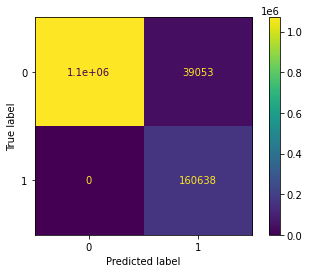

In [67]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_test50, y_test50_binary)
plt.show()

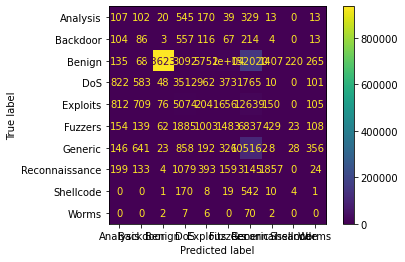

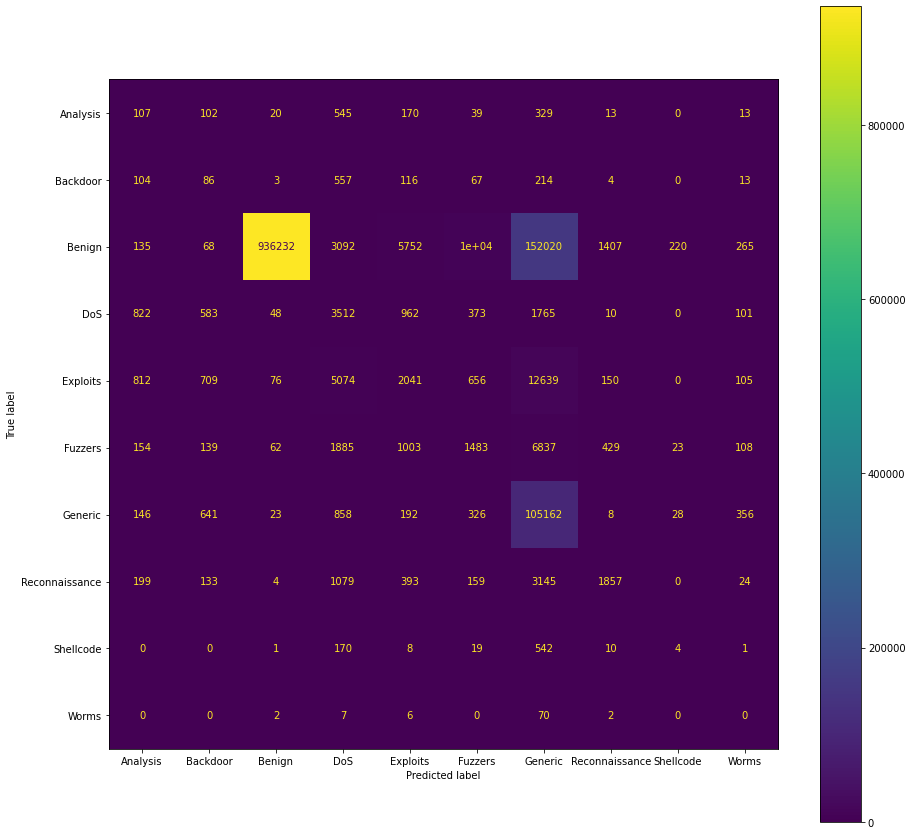

In [68]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)